# Sentiment Analysis

In [2]:
import pandas as pd
df = pd.read_csv('reviews.csv') # SPOTIFY APP REVIEWS
print(df.head())

     Time_submitted                                             Review  \
0  09-07-2022 15:00  Great music service, the audio is high quality...   
1  09-07-2022 14:21  Please ignore previous negative rating. This a...   
2  09-07-2022 13:27  This pop-up "Get the best Spotify experience o...   
3  09-07-2022 13:26    Really buggy and terrible to use as of recently   
4  09-07-2022 13:20  Dear Spotify why do I get songs that I didn't ...   

   Rating  Total_thumbsup Reply  
0       5               2   NaN  
1       5               1   NaN  
2       4               0   NaN  
3       1               1   NaN  
4       1               1   NaN  


# Clean the data as it looks messy

In [3]:
mydata = df.drop('Time_submitted', axis=1)
mydata.head()

,Review,Rating,Total_thumbsup,Reply
0,"Great music service, the audio is high quality...",5,2,NaN
1,Please ignore previous negative rating. This a...,5,1,NaN
2,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,Really buggy and terrible to use as of recently,1,1,NaN
4,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [4]:
mydata_clean = mydata.drop('Total_thumbsup', axis=1)
mydata_clean.head()

,Review,Rating,Reply
0,"Great music service, the audio is high quality...",5,NaN
1,Please ignore previous negative rating. This a...,5,NaN
2,"This pop-up ""Get the best Spotify experience o...",4,NaN
3,Really buggy and terrible to use as of recently,1,NaN
4,Dear Spotify why do I get songs that I didn't ...,1,NaN


In [5]:
mydata_clean = mydata_clean.drop('Reply', axis=1)
mydata_clean.head()

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1


In [6]:
mydata_clean.shape

(61594, 2)

In [7]:
mydataclean_tok = mydata_clean

In [8]:
mydataclean_tok

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1
...,...,...
61589,Even though it was communicated that lyrics fe...,1
61590,"Use to be sooo good back when I had it, and wh...",1
61591,This app would be good if not for it taking ov...,2
61592,The app is good hard to navigate and won't jus...,2


# pip install vadersentiment

# Step 1: Cleaning the text

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [10]:
tokenizer_1 = Tokenizer(num_words = 10000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer_1.fit_on_texts(mydata_clean)

In [11]:
mydata_clean['Cleaned Reviews'] = tokenizer_1.fit_on_texts(mydata_clean['Review'])

In [12]:
import re
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

In [14]:
# Cleaning the text in the review column
mydata_clean['Cleaned Reviews'] = mydata_clean['Review'].apply(clean)
mydata_clean.head()

,Review,Rating,Cleaned Reviews
0,"Great music service, the audio is high quality...",5,Great music service the audio is high quality ...
1,Please ignore previous negative rating. This a...,5,Please ignore previous negative rating This ap...
2,"This pop-up ""Get the best Spotify experience o...",4,This pop up Get the best Spotify experience on...
3,Really buggy and terrible to use as of recently,1,Really buggy and terrible to use as of recently
4,Dear Spotify why do I get songs that I didn't ...,1,Dear Spotify why do I get songs that I didn t ...


# Stetp 2: Tokenization

In [15]:
import nltk
from nltk.tokenize import word_tokenize

In [16]:
type(mydata_clean['Review'])

pandas.core.series.Series

In [17]:
#mydata_clean = mydata_clean['Review'].to_string()

In [18]:
#type(mydata_clean)

In [19]:
#len(mydata_clean)

In [20]:
#word_tokenize(mydata_clean)

In [21]:
mydataclean_tok['tokenized_sents'] = mydataclean_tok.apply(lambda row: nltk.word_tokenize(row['Review']), axis=1)

In [22]:
mydataclean_tok

,Review,Rating,Cleaned Reviews,tokenized_sents
0,"Great music service, the audio is high quality...",5,Great music service the audio is high quality ...,"[Great, music, service, ,, the, audio, is, hig..."
1,Please ignore previous negative rating. This a...,5,Please ignore previous negative rating This ap...,"[Please, ignore, previous, negative, rating, ...."
2,"This pop-up ""Get the best Spotify experience o...",4,This pop up Get the best Spotify experience on...,"[This, pop-up, ``, Get, the, best, Spotify, ex..."
3,Really buggy and terrible to use as of recently,1,Really buggy and terrible to use as of recently,"[Really, buggy, and, terrible, to, use, as, of..."
4,Dear Spotify why do I get songs that I didn't ...,1,Dear Spotify why do I get songs that I didn t ...,"[Dear, Spotify, why, do, I, get, songs, that, ..."
...,...,...,...,...
61589,Even though it was communicated that lyrics fe...,1,Even though it was communicated that lyrics fe...,"[Even, though, it, was, communicated, that, ly..."
61590,"Use to be sooo good back when I had it, and wh...",1,Use to be sooo good back when I had it and whe...,"[Use, to, be, sooo, good, back, when, I, had, ..."
61591,This app would be good if not for it taking ov...,2,This app would be good if not for it taking ov...,"[This, app, would, be, good, if, not, for, it,..."
61592,The app is good hard to navigate and won't jus...,2,The app is good hard to navigate and won t jus...,"[The, app, is, good, hard, to, navigate, and, ..."


In [36]:
mydata_tokenized = mydataclean_tok.drop('Review', axis=1)

In [37]:
#mydata_tokenized = mydata_tokenized.drop('Cleaned Reviews', axis=1)

In [38]:
mydata_tokenized.head()

,Rating,Cleaned Reviews,tokenized_sents
0,5,Great music service the audio is high quality ...,"[Great, music, service, ,, the, audio, is, hig..."
1,5,Please ignore previous negative rating This ap...,"[Please, ignore, previous, negative, rating, ...."
2,4,This pop up Get the best Spotify experience on...,"[This, pop-up, ``, Get, the, best, Spotify, ex..."
3,1,Really buggy and terrible to use as of recently,"[Really, buggy, and, terrible, to, use, as, of..."
4,1,Dear Spotify why do I get songs that I didn t ...,"[Dear, Spotify, why, do, I, get, songs, that, ..."


# Step 3: Enrichment – POS tagging

In [39]:
#mydatapos['tokenized_sents'] = mydata_tokenized.apply(lambda row: nltk.pos_tag(row['tokenized_sents']), axis=1)
#mydata_tokenized['POS tagged'] = mydata_tokenized['Cleaned Reviews'].apply(token_stop_pos)
#mydata.head()

# Step 4: Stopwords removal

In [43]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag

In [44]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [45]:
mydata_tokenized['POS tagged'] = mydata_tokenized['Cleaned Reviews'].apply(token_stop_pos)
mydata_tokenized.head()

,Rating,Cleaned Reviews,tokenized_sents,POS tagged
0,5,Great music service the audio is high quality ...,"[Great, music, service, ,, the, audio, is, hig...","[(Great, n), (music, n), (service, n), (audio,..."
1,5,Please ignore previous negative rating This ap...,"[Please, ignore, previous, negative, rating, ....","[(Please, n), (ignore, v), (previous, a), (neg..."
2,4,This pop up Get the best Spotify experience on...,"[This, pop-up, ``, Get, the, best, Spotify, ex...","[(pop, v), (Get, n), (best, a), (Spotify, a), ..."
3,1,Really buggy and terrible to use as of recently,"[Really, buggy, and, terrible, to, use, as, of...","[(Really, r), (buggy, a), (terrible, a), (use,..."
4,1,Dear Spotify why do I get songs that I didn t ...,"[Dear, Spotify, why, do, I, get, songs, that, ...","[(Dear, n), (Spotify, n), (get, v), (songs, n)..."


# Step 5: Obtaining the stem words – Lemmatization

In [46]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [49]:
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [51]:
mydata_tokenized['Lemma'] = mydata_tokenized['POS tagged'].apply(lemmatize)
mydata_tokenized.head()

,Rating,Cleaned Reviews,tokenized_sents,POS tagged,Lemma
0,5,Great music service the audio is high quality ...,"[Great, music, service, ,, the, audio, is, hig...","[(Great, n), (music, n), (service, n), (audio,...",Great music service audio high quality app e...
1,5,Please ignore previous negative rating This ap...,"[Please, ignore, previous, negative, rating, ....","[(Please, n), (ignore, v), (previous, a), (neg...",Please ignore previous negative rating app s...
2,4,This pop up Get the best Spotify experience on...,"[This, pop-up, ``, Get, the, best, Spotify, ex...","[(pop, v), (Get, n), (best, a), (Spotify, a), ...",pop Get best Spotify experience Android anno...
3,1,Really buggy and terrible to use as of recently,"[Really, buggy, and, terrible, to, use, as, of...","[(Really, r), (buggy, a), (terrible, a), (use,...",Really buggy terrible use recently
4,1,Dear Spotify why do I get songs that I didn t ...,"[Dear, Spotify, why, do, I, get, songs, that, ...","[(Dear, n), (Spotify, n), (get, v), (songs, n)...",Dear Spotify get song put playlist shuffle play


In [55]:
mydata_tokenized[['Cleaned Reviews','Lemma']]

,Cleaned Reviews,Lemma
0,Great music service the audio is high quality ...,Great music service audio high quality app e...
1,Please ignore previous negative rating This ap...,Please ignore previous negative rating app s...
2,This pop up Get the best Spotify experience on...,pop Get best Spotify experience Android anno...
3,Really buggy and terrible to use as of recently,Really buggy terrible use recently
4,Dear Spotify why do I get songs that I didn t ...,Dear Spotify get song put playlist shuffle play
...,...,...
61589,Even though it was communicated that lyrics fe...,Even though communicate lyric feature availa...
61590,Use to be sooo good back when I had it and whe...,Use sooo good back download free version pic...
61591,This app would be good if not for it taking ov...,app would good take device start comp Spotif...
61592,The app is good hard to navigate and won t jus...,app good hard navigate let play song click p...


# Sentiment Analysis using TextBlob: Try As Assignment - CO1. Next Week Submission.

# ## reviews.txt Dataset

# Sentiment Analysis using VADER

# VADER stands for Valence Aware Dictionary and Sentiment Reasoner. Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [56]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [57]:
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment

In [61]:
def vadersentimentanalysis(Review):
    vs = analyzer.polarity_scores(Review)
    return vs['compound']
mydata_tokenized['Vader Sentiment'] = mydata_tokenized['Lemma'].apply(vadersentimentanalysis)

In [62]:
mydata_tokenized

,Rating,Cleaned Reviews,tokenized_sents,POS tagged,Lemma,Vader Sentiment
0,5,Great music service the audio is high quality ...,"[Great, music, service, ,, the, audio, is, hig...","[(Great, n), (music, n), (service, n), (audio,...",Great music service audio high quality app e...,0.9169
1,5,Please ignore previous negative rating This ap...,"[Please, ignore, previous, negative, rating, ....","[(Please, n), (ignore, v), (previous, a), (neg...",Please ignore previous negative rating app s...,0.6249
2,4,This pop up Get the best Spotify experience on...,"[This, pop-up, ``, Get, the, best, Spotify, ex...","[(pop, v), (Get, n), (best, a), (Spotify, a), ...",pop Get best Spotify experience Android anno...,0.5859
3,1,Really buggy and terrible to use as of recently,"[Really, buggy, and, terrible, to, use, as, of...","[(Really, r), (buggy, a), (terrible, a), (use,...",Really buggy terrible use recently,-0.5233
4,1,Dear Spotify why do I get songs that I didn t ...,"[Dear, Spotify, why, do, I, get, songs, that, ...","[(Dear, n), (Spotify, n), (get, v), (songs, n)...",Dear Spotify get song put playlist shuffle play,0.6124
...,...,...,...,...,...,...
61589,1,Even though it was communicated that lyrics fe...,"[Even, though, it, was, communicated, that, ly...","[(Even, r), (though, None), (communicated, v),...",Even though communicate lyric feature availa...,-0.1779
61590,1,Use to be sooo good back when I had it and whe...,"[Use, to, be, sooo, good, back, when, I, had, ...","[(Use, n), (sooo, v), (good, a), (back, r), (d...",Use sooo good back download free version pic...,0.9100
61591,2,This app would be good if not for it taking ov...,"[This, app, would, be, good, if, not, for, it,...","[(app, n), (would, None), (good, a), (taking, ...",app would good take device start comp Spotif...,-0.8363
61592,2,The app is good hard to navigate and won t jus...,"[The, app, is, good, hard, to, navigate, and, ...","[(app, n), (good, a), (hard, r), (navigate, v)...",app good hard navigate let play song click p...,0.8271


In [63]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

In [64]:
mydata_tokenized['Vader Analysis'] = mydata_tokenized['Vader Sentiment'].apply(vader_analysis)
mydata_tokenized.head()

,Rating,Cleaned Reviews,tokenized_sents,POS tagged,Lemma,Vader Sentiment,Vader Analysis
0,5,Great music service the audio is high quality ...,"[Great, music, service, ,, the, audio, is, hig...","[(Great, n), (music, n), (service, n), (audio,...",Great music service audio high quality app e...,0.9169,Positive
1,5,Please ignore previous negative rating This ap...,"[Please, ignore, previous, negative, rating, ....","[(Please, n), (ignore, v), (previous, a), (neg...",Please ignore previous negative rating app s...,0.6249,Positive
2,4,This pop up Get the best Spotify experience on...,"[This, pop-up, ``, Get, the, best, Spotify, ex...","[(pop, v), (Get, n), (best, a), (Spotify, a), ...",pop Get best Spotify experience Android anno...,0.5859,Positive
3,1,Really buggy and terrible to use as of recently,"[Really, buggy, and, terrible, to, use, as, of...","[(Really, r), (buggy, a), (terrible, a), (use,...",Really buggy terrible use recently,-0.5233,Negative
4,1,Dear Spotify why do I get songs that I didn t ...,"[Dear, Spotify, why, do, I, get, songs, that, ...","[(Dear, n), (Spotify, n), (get, v), (songs, n)...",Dear Spotify get song put playlist shuffle play,0.6124,Positive


# Count the number of positive, negative, neutral reviews.

In [66]:
vader_counts = mydata_tokenized['Vader Analysis'].value_counts()
vader_counts

Positive    31252
Neutral     25471
Negative     4871
Name: Vader Analysis, dtype: int64

# Sentiment Analysis using SentiWordNet - And Compare all the three Sentiment Analysis APIs - Assignment 2 Co1

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

([<matplotlib.patches.Wedge at 0x2218df244c0>,
 [Text(-0.0255256992997206, 1.099703795881082, 'Positive'),
  Text(-0.24567147167118042, -1.0722152433196035, 'Neutral'),
  Text(1.3085496936431784, -0.33196038809825507, 'Negative')],
 [Text(-0.013923108708938509, 0.5998384341169538, '50.7%'),
  Text(-0.13400262091155293, -0.5848446781743291, '41.4%'),
  Text(0.8239016589605197, -0.2090120962100124, '7.9%')])

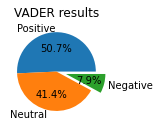

In [68]:
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, 
        explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)